# Subgroup analyses in the paper
In this notebook, we will perform the subgroup analyses to (re)produce the results in figure 5 (except the analysis for SATB1, as these are included in the tutorial). The results will not be exactly the same, due to some random initialisations.
First, lets import PhenoScore and initialize it with the standard parameters.

In [1]:
from phenoscore.phenoscorer import PhenoScorer
import os

2023-06-29 09:16:37,224 - phenopy - INFO - checking if config file exists: C:\ProgramData\Anaconda3\envs\PhenoScore\.phenopy
2023-06-29 09:16:37,224 - phenopy - INFO - phenopy 0.5.2
2023-06-29 09:16:37,235 - phenopy - INFO - Using configuration file: C:\ProgramData\Anaconda3\envs\PhenoScore\.phenopy\phenopy.ini


In [2]:
mode = 'both'
phenoscorer = PhenoScorer(gene_name='SETBP1', 
                          mode=mode,
                          method_hpo_similarity='Resnik',
                          method_summ_hpo_similarities='BMA')

Using CPU, since no GPUs are found!


Now that PhenoScore is ready, let's load data. First, let's start with the analysis for SETBP1 (Fig 5A). 

In [3]:
X, y, img_paths, df_data = phenoscorer.load_data_from_excel(os.path.join('\\\\umcsanfsclp01\\gen_archive\\Genetica-Projecten\\Facial Recognition\\Facial Recognition Syndromen\\SETBP1', 'setbp1_subgroup_analysis', 'df_data.xlsx'))
print('Data loaded!')

Data loaded!


Now that the data is loaded, we can run the permutation test, to see if we can distinguish the two groups.

In [4]:
phenoscorer.permutation_test(X, y, bootstraps=1000)
print("Brier:" + str(phenoscorer.permutation_test_brier))
print("AUC:" + str(phenoscorer.permutation_test_auc))
print("P value:" + str(phenoscorer.permutation_test_p_value))

100%|██████████| 1001/1001 [02:31<00:00,  6.62it/s]


Brier:0.009785185322803673
AUC:1.0
P value:0.04225196413436681


The result is significant! So PhenoScore is able to detect a phenotypic difference between the two groups. Of course, we would like to know what the clinical difference is. So let's investigate this, using LIME. 

Starting cross validation procedure to compare using facial/HPO data only with PhenoScore.
Finished cross validation and evaluation of model scores. Now starting LIME for the top 5 predictions to generate heatmaps and visualise phenotypic differences.


100%|██████████| 5/5 [2:03:20<00:00, 1480.18s/it]


Figure saved as lime_figure_setbp1.pdf


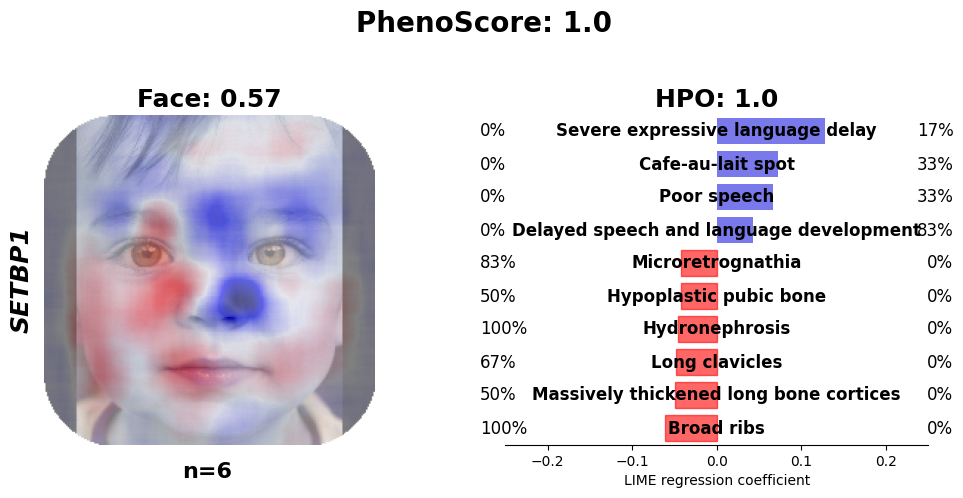

LIME images generated!


In [5]:
phenoscorer.get_lime(X, y, img_paths, n_lime=5)
phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                        df_data=df_data, filename='lime_figure_setbp1.pdf')
print("LIME images generated!")

Lets repeat the procedure, but now for ADNP and SETBP1. 
For ADNP, the percentages will not correspond with the percentages of the figure in the paper: this is because for the figure in the paper, we took "unknown" into account (i.e. if for an individual, short stature was unknown, we did not include that individual to calculate the prevalence). PhenoScore in general does not support unknown features (yet), so that is why there is a discrepancy (but of course the results and main conclusions are the same).

Using CPU, since no GPUs are found!
Data loaded!


100%|██████████| 1001/1001 [03:41<00:00,  4.51it/s]


Brier:0.2426012187041396
AUC:0.7217598097502973
P value:0.03196803196803199
Starting cross validation procedure to compare using facial/HPO data only with PhenoScore.
Finished cross validation and evaluation of model scores. Now starting LIME for the top 5 predictions to generate heatmaps and visualise phenotypic differences.


100%|██████████| 5/5 [07:46<00:00, 93.38s/it]


Figure saved as lime_figure_adnp.pdf


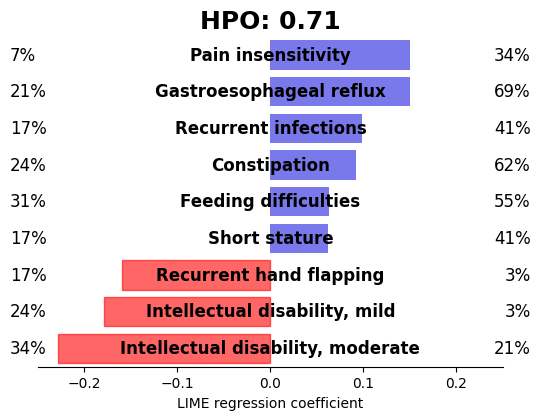

LIME images generated!
Using CPU, since no GPUs are found!
Data loaded!


100%|██████████| 1001/1001 [02:33<00:00,  6.53it/s]


Brier:0.12336017232700204
AUC:0.9387755102040816
P value:0.005994005994005994
Starting cross validation procedure to compare using facial/HPO data only with PhenoScore.
Finished cross validation and evaluation of model scores. Now starting LIME for the top 5 predictions to generate heatmaps and visualise phenotypic differences.


100%|██████████| 5/5 [2:05:45<00:00, 1509.16s/it]


Figure saved as lime_figure_deaf1.pdf


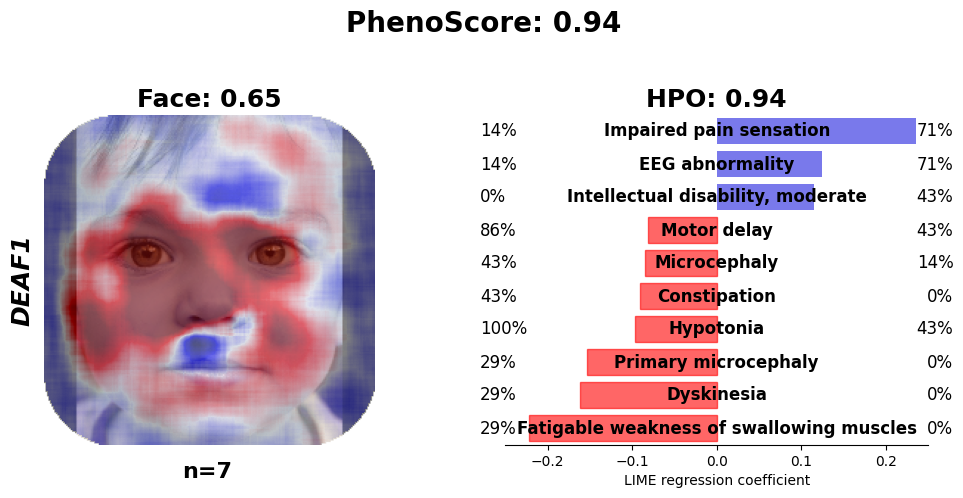

LIME images generated!


In [6]:
paths = [os.path.join("\\\\umcsanfsclp01\\gen_archive\\Genetica-Projecten\\Facial Recognition\\Facial Recognition Syndromen\\ADNP\\ADNP_methylation", 'df_data.xlsx'),
         os.path.join("\\\\umcsanfsclp01\\gen_archive\\Genetica-Projecten\\Facial Recognition\\Facial Recognition Syndromen\\DEAF1_AD\\deaf1_subgroup_analysis", 'df_data.xlsx')  
]
gene_names = ['ADNP', 'DEAF1']

for i in range(len(gene_names)):
    if gene_names[i] == 'ADNP':
        mode = 'hpo'
    else:
        mode = 'both'
    phenoscorer = PhenoScorer(gene_name=gene_names[i], 
                              mode=mode,
                              method_hpo_similarity='Resnik',
                              method_summ_hpo_similarities='BMA')
    X, y, img_paths, df_data = phenoscorer.load_data_from_excel(paths[i])
    print('Data loaded!')
    phenoscorer.permutation_test(X, y, bootstraps=1000)
    print("Brier:" + str(phenoscorer.permutation_test_brier))
    print("AUC:" + str(phenoscorer.permutation_test_auc))
    print("P value:" + str(phenoscorer.permutation_test_p_value))
    phenoscorer.get_lime(X, y, img_paths, n_lime=5)
    phenoscorer.gen_lime_and_results_figure(bg_image=os.path.join('../', 'phenoscore', 'sample_data','background_image.jpg'),
                                            df_data=df_data, filename='lime_figure_' + gene_names[i].lower() + '.pdf')
    print("LIME images generated!")